# EJERCICIO 1

In [ ]:
!pip show geopandas

In [4]:
import os, geopandas as gpd
countries= gpd.read_file('https://github.com/davasquezm/introgeodf/raw/refs/heads/main/maps/World_Countries.shp')


In [5]:
type(countries)

geopandas.geodataframe.GeoDataFrame

In [6]:
countries.shape

(252, 2)

In [7]:
countries.columns

Index(['COUNTRY', 'geometry'], dtype='object')

In [8]:
countries.head()

,COUNTRY,geometry
0,Aruba (Netherlands),"POLYGON ((-69.88223 12.41111, -69.94695 12.436..."
1,Antigua and Barbuda,"MULTIPOLYGON (((-61.73889 17.54055, -61.75195 ..."
2,Afghanistan,"POLYGON ((61.27656 35.60725, 61.29638 35.62853..."
3,Algeria,"POLYGON ((-5.15213 30.18047, -5.13917 30.19236..."
4,Azerbaijan,"MULTIPOLYGON (((46.54037 38.87559, 46.49554 38..."


In [9]:
countries.geom_type.unique()

array(['Polygon', 'MultiPolygon'], dtype=object)

In [10]:
countries[countries.isna().any(axis=1)]

,COUNTRY,geometry


In [11]:
countries.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 252 entries, 0 to 251
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   COUNTRY   252 non-null    object  
 1   geometry  252 non-null    geometry
dtypes: geometry(1), object(1)
memory usage: 4.1+ KB


<Axes: >

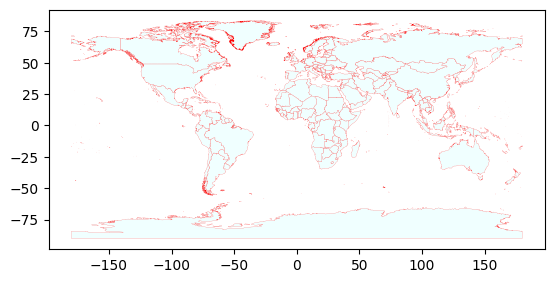

In [12]:
countries.plot(facecolor="azure",#color of polygon fill
               edgecolor='red', #color of lines
               linewidth=0.1) #thickness of lines

In [13]:
rivers=gpd.read_file("https://github.com/davasquezm/introgeodf/raw/refs/heads/main/maps/World_Hydrography.shp")
cities=gpd.read_file("https://github.com/davasquezm/introgeodf/raw/refs/heads/main/maps/World_Cities.shp")

In [14]:
rivers.geom_type.unique(), cities.geom_type.unique()

(array(['LineString', 'MultiLineString'], dtype=object),
 array(['Point'], dtype=object))

<Axes: >

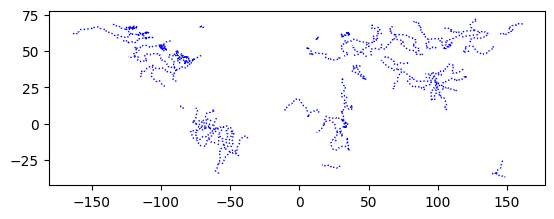

In [15]:
rivers.plot(edgecolor='blue',
            linewidth=1,
            linestyle='dotted')

<Axes: >

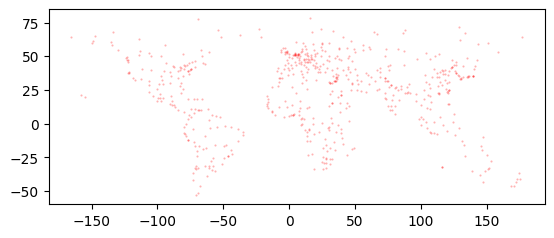

In [16]:
cities.plot(marker='.', # marker type
            color='red',
            markersize=1,
            alpha=0.3) # transparency

<Axes: >

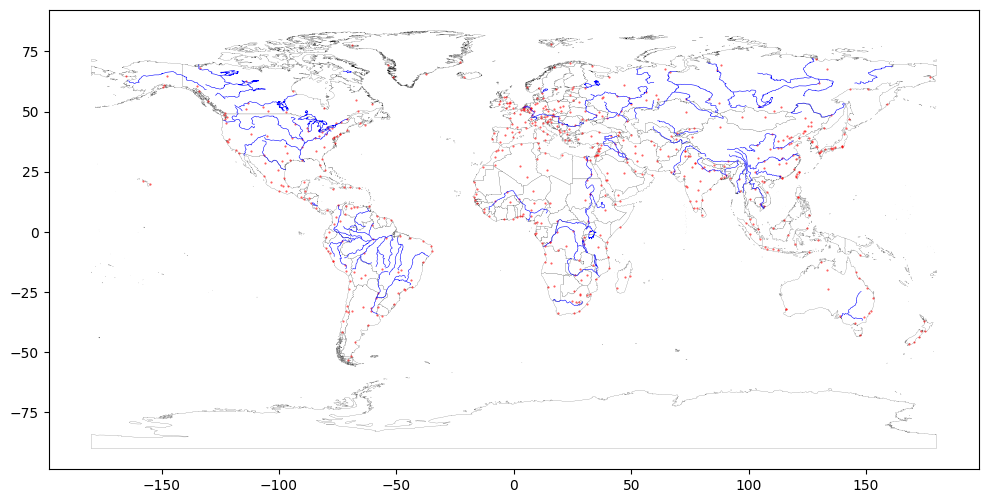

In [17]:
base = countries.plot(facecolor="white",
                      edgecolor='black',
                      linewidth=0.1,
                      figsize=(12,12))

rivers.plot(edgecolor='blue', linewidth=0.4,
            ax=base)# on top of...
cities.plot(marker='.', color='red', markersize=1,alpha=0.7,
            ax=base) # on top of...

In [18]:
import os
countries.to_file(os.path.join("maps","worldMaps.gpkg"), layer='countries', driver="GPKG")
rivers.to_file(os.path.join("maps","worldMaps.gpkg"), layer='rivers', driver="GPKG")
cities.to_file(os.path.join("maps","worldMaps.gpkg"), layer='cities', driver="GPKG")

In [19]:
countries

,COUNTRY,geometry
0,Aruba (Netherlands),"POLYGON ((-69.88223 12.41111, -69.94695 12.436..."
1,Antigua and Barbuda,"MULTIPOLYGON (((-61.73889 17.54055, -61.75195 ..."
2,Afghanistan,"POLYGON ((61.27656 35.60725, 61.29638 35.62853..."
3,Algeria,"POLYGON ((-5.15213 30.18047, -5.13917 30.19236..."
4,Azerbaijan,"MULTIPOLYGON (((46.54037 38.87559, 46.49554 38..."
...,...,...
247,South Sudan,"POLYGON ((34.21807 9.96458, 34.20722 9.905, 34..."
248,Indonesia,"MULTIPOLYGON (((123.21846 -10.80917, 123.19832..."
249,East Timor,"MULTIPOLYGON (((124.41824 -9.3001, 124.40446 -..."
250,Curacao (Netherlands),"POLYGON ((-68.96556 12.19889, -68.91196 12.181..."


In [20]:
India=countries[countries.COUNTRY=='India']

In [21]:
India.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [22]:
  India.crs.axis_info

[Axis(name=Geodetic latitude, abbrev=Lat, direction=north, unit_auth_code=EPSG, unit_code=9122, unit_name=degree),
 Axis(name=Geodetic longitude, abbrev=Lon, direction=east, unit_auth_code=EPSG, unit_code=9122, unit_name=degree)]

In [23]:
India.crs.is_projected

False

In [24]:
India.centroid

<ipython-input-24-abb7a827f9dc>:1: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  India.centroid


,0
104,POINT (79.61623 22.8836)


In [25]:
India.to_crs(4326).crs.axis_info

[Axis(name=Geodetic latitude, abbrev=Lat, direction=north, unit_auth_code=EPSG, unit_code=9122, unit_name=degree),
 Axis(name=Geodetic longitude, abbrev=Lon, direction=east, unit_auth_code=EPSG, unit_code=9122, unit_name=degree)]

In [26]:
India.to_crs(4326).centroid

<ipython-input-26-21467515e2ad>:1: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  India.to_crs(4326).centroid


,0
104,POINT (79.61623 22.8836)


<ipython-input-27-e22db78708ee>:4: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  India.to_crs(4326).centroid.plot(color='red',ax=base4326)


<Axes: >

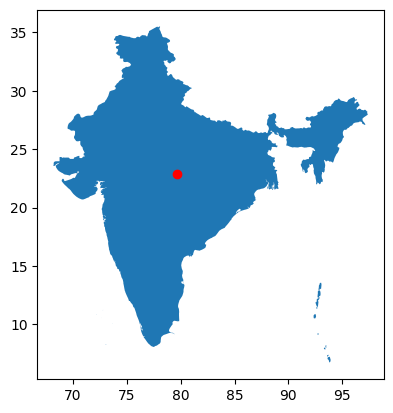

In [27]:
# replotting:

base4326=India.to_crs(4326).plot()
India.to_crs(4326).centroid.plot(color='red',ax=base4326)

In [28]:
cities_India_4326=cities[cities.COUNTRY=='India'].to_crs(4326)

In [29]:
riversIndia_clipped=gpd.clip(rivers,India)

In [30]:
India_4326=India.to_crs(4326)

rivers_India_4326=riversIndia_clipped.to_crs(India_4326.crs)

In [31]:
## saving


import os

India_4326.to_file(os.path.join("maps","IndiaMaps_4326.gpkg"), layer='country', driver="GPKG")
cities_India_4326.to_file(os.path.join("maps","IndiaMaps_4326.gpkg"), layer='cities', driver="GPKG")
rivers_India_4326.to_file(os.path.join("maps","IndiaMaps_4326.gpkg"), layer='rivers', driver="GPKG")
#India_4326.centroid.to_file(os.path.join("maps","IndiaMaps_4326.gpkg"), layer='centroid', driver="GPKG")

**EJERCICIO 1**


In [32]:
import pandas as pd
import os
infoairports=pd.read_csv(os.path.join("data", "br-airports.csv"))
# some rows
infoairports.iloc[[0,1,2,3,-4,-3,-2,-1],:]


,id,ident,type,name,latitude_deg,longitude_deg,elevation_ft,continent,country_name,iso_country,...,municipality,scheduled_service,gps_code,iata_code,local_code,home_link,wikipedia_link,keywords,score,last_updated
0,#meta +id,#meta +code,#loc +airport +type,#loc +airport +name,#geo +lat,#geo +lon,#geo +elevation +ft,#region +continent +code,#country +name,#country +code +iso2,...,#loc +municipality +name,#status +scheduled,#loc +airport +code +gps,#loc +airport +code +iata,#loc +airport +code +local,#meta +url +airport,#meta +url +wikipedia,#meta +keywords,#meta +score,#date +updated
1,5910,SBGR,large_airport,Guarulhos - Governador André Franco Montoro In...,-23.431944,-46.467778,2461,SA,Brazil,BR,...,São Paulo,1,SBGR,GRU,SP0002,http://www.aeroportoguarulhos.net/,https://en.wikipedia.org/wiki/S%C3%A3o_Paulo-G...,Cumbica,1016675,2021-10-28T15:52:55+00:00
2,5906,SBGL,large_airport,Rio Galeão – Tom Jobim International Airport,-22.809999,-43.250557,28,SA,Brazil,BR,...,Rio De Janeiro,1,SBGL,GIG,RJ0001,NaN,https://en.wikipedia.org/wiki/Rio_de_Janeiro-G...,Galeão - Antônio Carlos Jobim International Ai...,51475,2021-10-14T18:09:35+00:00
3,5974,SBSP,medium_airport,Congonhas Airport,-23.627657,-46.654601,2631,SA,Brazil,BR,...,São Paulo,1,SBSP,CGH,SP0001,http://www.infraero.gov.br/usa/aero_prev_home....,https://en.wikipedia.org/wiki/Congonhas-S%C3%A...,http://www.infraero.gov.br/usa/aero_prev_home....,750,2022-05-03T20:10:35+00:00
6668,309669,SSVR,closed,Volta Redonda Airport,-22.4978,-44.085,1245,SA,Brazil,BR,...,Volta Redonda,0,NaN,NaN,NaN,NaN,NaN,"SSVR, SSVR, QVR",0,2013-09-28T14:52:12+00:00
6669,505308,BR-1760,heliport,Unimed Volta Redonda Helipad,-22.533988,-44.076918,1385,SA,Brazil,BR,...,Volta Redonda,0,SSKV,NaN,RJ0147,NaN,NaN,NaN,0,2022-12-06T21:28:25+00:00
6670,341727,BR-1429,heliport,Santa Helena Heliport,-23.59851,-47.441196,2254,SA,Brazil,BR,...,Votorantim,0,SWHE,NaN,SP0807,NaN,NaN,NaN,0,2021-03-07T10:30:07+00:00
6671,343017,BR-1493,heliport,Bandeiras Centro Empresarial Heliport,-23.536615,-47.449475,1827,SA,Brazil,BR,...,Votorantim,0,SWST,NaN,SP1306,NaN,NaN,NaN,0,2021-04-14T20:12:01+00:00


In [33]:
# keep columns needed
infoairports.columns

Index(['id', 'ident', 'type', 'name', 'latitude_deg', 'longitude_deg',
       'elevation_ft', 'continent', 'country_name', 'iso_country',
       'region_name', 'iso_region', 'local_region', 'municipality',
       'scheduled_service', 'gps_code', 'iata_code', 'local_code', 'home_link',
       'wikipedia_link', 'keywords', 'score', 'last_updated'],
      dtype='object')

In [34]:
keep=['name','type','latitude_deg', 'longitude_deg','elevation_ft','region_name','municipality']
infoairports=infoairports.loc[:,keep]

infoairports.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6672 entries, 0 to 6671
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   name           6672 non-null   object
 1   type           6672 non-null   object
 2   latitude_deg   6672 non-null   object
 3   longitude_deg  6672 non-null   object
 4   elevation_ft   6501 non-null   object
 5   region_name    6672 non-null   object
 6   municipality   6648 non-null   object
dtypes: object(7)
memory usage: 365.0+ KB


In [35]:
numericCols=['latitude_deg', 'longitude_deg', 'elevation_ft']
for col in numericCols:
  infoairports[col]=pd.to_numeric(infoairports[col], errors= 'coerce')

infoairports[numericCols]=infoairports[numericCols].apply(pd.to_numeric)

In [36]:
#now
infoairports.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6672 entries, 0 to 6671
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           6672 non-null   object 
 1   type           6672 non-null   object 
 2   latitude_deg   6671 non-null   float64
 3   longitude_deg  6671 non-null   float64
 4   elevation_ft   6500 non-null   float64
 5   region_name    6672 non-null   object 
 6   municipality   6648 non-null   object 
dtypes: float64(3), object(4)
memory usage: 365.0+ KB


<Axes: xlabel='longitude_deg', ylabel='latitude_deg'>

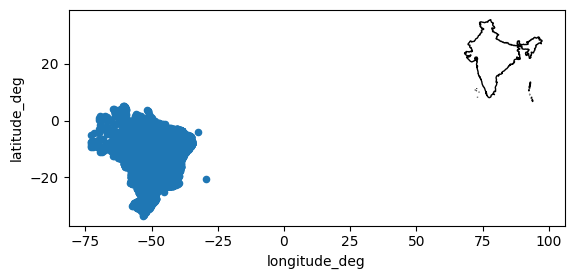

In [37]:
# let's plot

base = India_4326.plot(color='white', edgecolor='black') #unprojected

infoairports.plot.scatter(x = 'longitude_deg', y = 'latitude_deg',ax=base)

<Axes: >

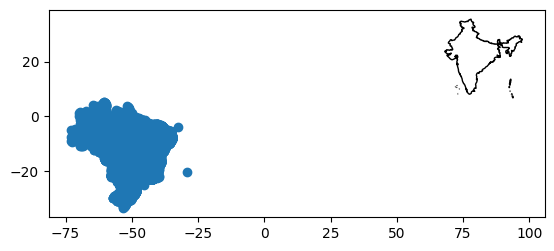

In [38]:
airports=gpd.GeoDataFrame(data=infoairports.copy(),
                 geometry=gpd.points_from_xy(infoairports.longitude_deg,
                                             infoairports.latitude_deg),
                 crs=India.crs.to_epsg())# the coordinates were in degrees - unprojected

# let's plot

base = India_4326.plot(color='white', edgecolor='black')
airports.plot(ax=base)

In [39]:
#remember:
type(airports), type(infoairports)

(geopandas.geodataframe.GeoDataFrame, pandas.core.frame.DataFrame)

<Axes: >

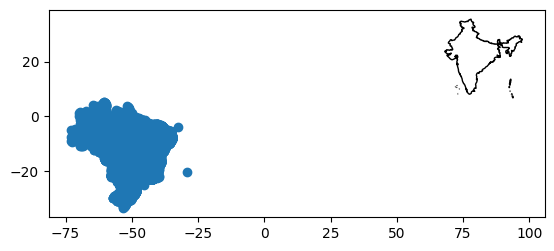

In [40]:
airports_4326=airports.to_crs(4326)

## then

base = India_4326.plot(color='white', edgecolor='black')
airports_4326.plot(ax=base)

In [41]:
airports_4326['type'].value_counts() # this will not work: airports.type.value_counts()

,count
type,
small_airport,4587
heliport,1699
closed,251
medium_airport,124
large_airport,8
seaplane_base,2
#loc +airport +type,1


In [42]:
airports_4326.rename(columns={'type':'kind'},inplace=True)

## adding the airports to GPKG
airports_4326.to_file(os.path.join("maps","IndiaMaps_4326.gpkg"), layer='airports', driver="GPKG")

# EJERCICIO 2

In [43]:
India_4326

,COUNTRY,geometry
104,India,"MULTIPOLYGON (((92.2686 23.71944, 92.20305 23...."


In [44]:
India_4326.boundary

,0
104,"MULTILINESTRING ((92.2686 23.71944, 92.20305 2..."


<Axes: >

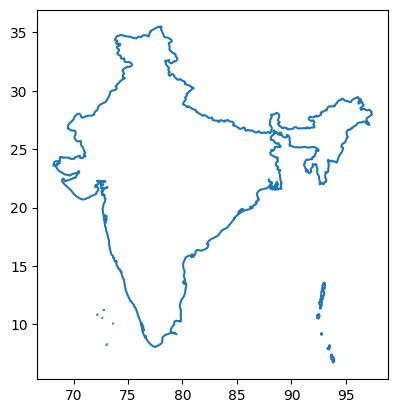

In [45]:
India_4326.boundary.plot()

In [46]:
type(India_4326.boundary)

geopandas.geoseries.GeoSeries

In [47]:
India_4326.boundary.to_frame()

,0
104,"MULTILINESTRING ((92.2686 23.71944, 92.20305 2..."


In [48]:
India_4326.boundary.to_frame().info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Index: 1 entries, 104 to 104
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype   
---  ------  --------------  -----   
 0   0       1 non-null      geometry
dtypes: geometry(1)
memory usage: 16.0 bytes


In [49]:
# conversion
India_border=India_4326.boundary.to_frame()

# new column (optional)
India_border['name']='India'

# renaming the geometry column
India_border.rename(columns={0:'geometry'},inplace=True)

#setting the geometry (the name is not enough)
India_border = India_border.set_geometry("geometry")

# verifying:
India_border.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [50]:
India_border

,geometry,name
104,"MULTILINESTRING ((92.2686 23.71944, 92.20305 2...",India


# EJERCICIO 3

In [51]:
India_states=gpd.read_file("https://github.com/davasquezm/introgeodf/raw/refs/heads/main/maps/geoBoundaries-IND-ADM1_simplified.shp")
India_municipalities=gpd.read_file("https://github.com/davasquezm/introgeodf/raw/refs/heads/main/maps/geoBoundaries-IND-ADM2_simplified.shp")

In [52]:
type(India_states), type(India_municipalities)

(geopandas.geodataframe.GeoDataFrame, geopandas.geodataframe.GeoDataFrame)

In [53]:
India_states.geometry.head()

,geometry
0,"MULTIPOLYGON (((75.53056 11.70403, 75.53585 11..."
1,"MULTIPOLYGON (((80.27289 18.72299, 80.27091 18..."
2,"POLYGON ((95.23392 26.68246, 95.22921 26.67376..."
3,"MULTIPOLYGON (((73.01113 8.27759, 73.01158 8.2..."
4,"MULTIPOLYGON (((79.39526 25.03209, 79.3942 25...."


In [54]:
India_municipalities.geometry.head()

,geometry
0,"POLYGON ((78.17491 24.84254, 78.19378 24.83816..."
1,"POLYGON ((77.38167 23.07004, 77.38922 23.07285..."
2,"POLYGON ((79.23988 22.79135, 79.24007 22.78979..."
3,"POLYGON ((78.27229 22.39973, 78.27817 22.39642..."
4,"POLYGON ((78.03027 22.79953, 78.03802 22.79961..."


But, notice this:

In [55]:
India_states.crs, India_municipalities.crs

(<Geographic 2D CRS: EPSG:4326>
 Name: WGS 84
 Axis Info [ellipsoidal]:
 - Lat[north]: Geodetic latitude (degree)
 - Lon[east]: Geodetic longitude (degree)
 Area of Use:
 - name: World.
 - bounds: (-180.0, -90.0, 180.0, 90.0)
 Datum: World Geodetic System 1984 ensemble
 - Ellipsoid: WGS 84
 - Prime Meridian: Greenwich,
 <Geographic 2D CRS: EPSG:4326>
 Name: WGS 84
 Axis Info [ellipsoidal]:
 - Lat[north]: Geodetic latitude (degree)
 - Lon[east]: Geodetic longitude (degree)
 Area of Use:
 - name: World.
 - bounds: (-180.0, -90.0, 180.0, 90.0)
 Datum: World Geodetic System 1984 ensemble
 - Ellipsoid: WGS 84
 - Prime Meridian: Greenwich)

<Axes: >

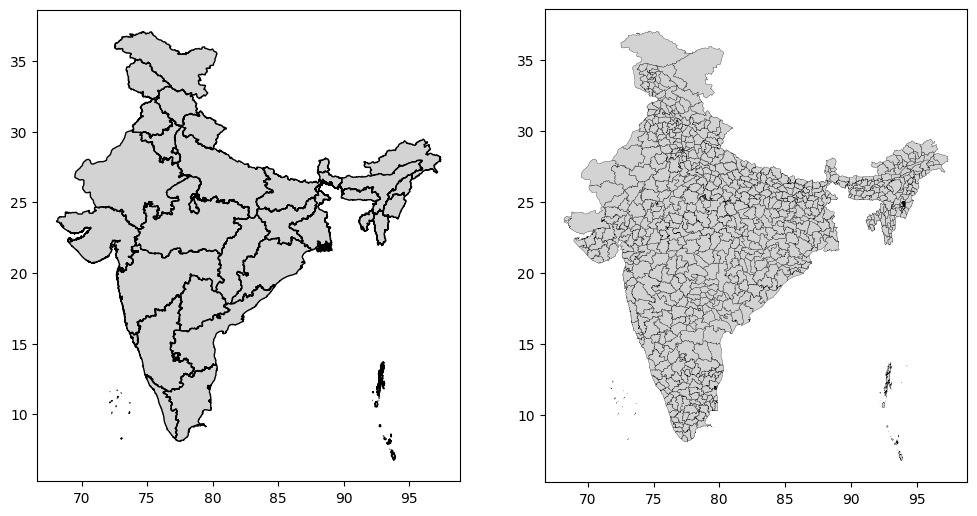

In [56]:
import matplotlib.pyplot as plt

fig, (ax1, ax2) = plt.subplots(ncols=2, sharex=False, sharey=False, figsize=(12,12))

India_states.plot(ax=ax1, facecolor='lightgrey', edgecolor='black')
India_municipalities.plot(ax=ax2, facecolor='lightgrey', edgecolor='black',linewidth=0.2)

In [57]:
## uncomment this to see the error message
# India_states.to_crs(2346)

Python says "Please set a crs on the object first". This would mean to know the actual projection, of the geometry:

From the plots above and the rows seen, we conclude the maps are unprojected; then:

In [58]:
# set as unprojected
India_states.crs = "EPSG:2346"
India_municipalities.crs = "EPSG:2346"

In [59]:
India_states=India_states.to_crs(2346)
India_municipalities=India_municipalities.to_crs(2346)

# EJERCICIO 4

In [60]:
countries.head()

,COUNTRY,geometry
0,Aruba (Netherlands),"POLYGON ((-69.88223 12.41111, -69.94695 12.436..."
1,Antigua and Barbuda,"MULTIPOLYGON (((-61.73889 17.54055, -61.75195 ..."
2,Afghanistan,"POLYGON ((61.27656 35.60725, 61.29638 35.62853..."
3,Algeria,"POLYGON ((-5.15213 30.18047, -5.13917 30.19236..."
4,Azerbaijan,"MULTIPOLYGON (((46.54037 38.87559, 46.49554 38..."


In [61]:
import pandas as pd

fragilityCiaLink="https://github.com/CienciaDeDatosEspacial/merging/raw/main/FragilityCia_isos.csv"

fragilityCia=pd.read_csv(fragilityCiaLink)

fragilityCia.head()

,Officialstatename,InternetccTLD,iso2,iso3,Country,fragility_date,fragility,co2,co2_date,region,ForestRev_gdp,ForestRev_date
0,The Islamic Republic of Afghanistan,.af,AF,AFG,AFGHANISTAN,2019,105.0,7893000.0,2019,SOUTH ASIA,0.20,2018
1,The Republic of Albania,.al,AL,ALB,ALBANIA,2019,58.9,3794000.0,2019,EUROPE,0.18,2018
2,The People's Democratic Republic of Algeria,.dz,DZ,DZA,ALGERIA,2019,75.4,151633000.0,2019,AFRICA,0.10,2018
3,The Republic of Angola,.ao,AO,AGO,ANGOLA,2019,87.8,19362000.0,2019,AFRICA,0.36,2018
4,Antigua and Barbuda,.ag,AG,ATG,ANTIGUA AND BARBUDA,2019,54.4,729000.0,2019,CENTRAL AMERICA AND THE CARIBBEAN,0.00,2018


In [62]:
# to upper case.
countries['COUNTRY']=countries.COUNTRY.str.upper()

In [63]:
onlyFragilCia=set(fragilityCia.Country)- set(countries.COUNTRY)
onlyMap=set(countries.COUNTRY)- set(fragilityCia.Country)

In [64]:
onlyFragilCia

{'BAHAMAS (THE)',
 'BOLIVIA (PLURINATIONAL STATE OF)',
 'BRUNEI DARUSSALAM',
 'CABO VERDE',
 'CENTRAL AFRICAN REPUBLIC (THE)',
 'COMOROS (THE)',
 'CONGO (THE DEMOCRATIC REPUBLIC OF THE)',
 'CONGO (THE)',
 'CZECHIA',
 "CÔTE D'IVOIRE",
 'DOMINICAN REPUBLIC (THE)',
 'ESWATINI',
 'GAMBIA (THE)',
 'IRAN (ISLAMIC REPUBLIC OF)',
 'KOREA (THE REPUBLIC OF)',
 "LAO PEOPLE'S DEMOCRATIC REPUBLIC (THE)",
 'MICRONESIA (FEDERATED STATES OF)',
 'MOLDOVA (THE REPUBLIC OF)',
 'NETHERLANDS (THE)',
 'NIGER (THE)',
 'NORTH MACEDONIA',
 'PHILIPPINES (THE)',
 'RUSSIAN FEDERATION (THE)',
 'SAMOA',
 'SUDAN (THE)',
 'TANZANIA, THE UNITED REPUBLIC OF',
 'TIMOR-LESTE',
 'UNITED ARAB EMIRATES (THE)',
 'UNITED KINGDOM OF GREAT BRITAIN AND NORTHERN IRELAND (THE)',
 'UNITED STATES OF AMERICA (THE)',
 'VIET NAM'}

In [65]:
# and here
onlyMap

{'AMERICAN SAMOA (US)',
 'AMERICAN VIRGIN ISLANDS (US)',
 'ANDORRA',
 'ANGUILLA (UK)',
 'ANTARCTICA',
 'ARUBA (NETHERLANDS)',
 'BAHAMAS',
 'BAKER ISLAND (US)',
 'BERMUDA (UK)',
 'BOLIVIA',
 'BONAIRE (NETHERLANDS)',
 'BOUVET ISLAND (NORWAY)',
 'BRITISH INDIAN OCEAN TERRITORY (UK)',
 'BRITISH VIRGIN ISLANDS(UK)',
 'BRUNEI',
 'CAPE VERDE',
 'CAYMAN ISLANDS (UK)',
 'CENTRAL AFRICAN REPUBLIC',
 'CHRISTMAS ISLAND (AUSTRALIA)',
 'COCOS (KEELING) ISLANDS (AUSTRALIA)',
 'COMOROS',
 'CONGO',
 'COOK ISLANDS (NEW ZEALAND)',
 'CURACAO (NETHERLANDS)',
 'CZECH REPUBLIC',
 'DEMOCRATIC REPUBLIC OF THE CONGO',
 'DOMINICA',
 'DOMINICAN REPUBLIC',
 'EAST TIMOR',
 'ERITREA',
 'FALKLAND ISLANDS (UK)',
 'FAROE ISLANDS (DENMARK)',
 'FEDERATED STATES OF MICRONESIA',
 'FRENCH GUIANA (FRANCE)',
 'FRENCH POLYNESIA (FRANCE)',
 'FRENCH SOUTHERN & ANTARCTIC LANDS (FRANCE)',
 'GAMBIA',
 'GIBRALTAR (UK)',
 'GLORIOSO ISLANDS (FRANCE)',
 'GREENLAND (DENMARK)',
 'GUADELOUPE (FRANCE)',
 'GUAM (US)',
 'GUERNSEY (UK)',
 'HE

In [67]:
!pip install thefuzz

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 26.5 MB/s eta 0:00:00


In [68]:
from thefuzz import process

[(country, process.extractOne(country,onlyMap)) for country in sorted(onlyFragilCia)]

[('BAHAMAS (THE)', ('BAHAMAS', 90)),
 ('BOLIVIA (PLURINATIONAL STATE OF)', ('BOLIVIA', 90)),
 ('BRUNEI DARUSSALAM', ('BRUNEI', 90)),
 ('CABO VERDE', ('CAPE VERDE', 80)),
 ('CENTRAL AFRICAN REPUBLIC (THE)', ('CENTRAL AFRICAN REPUBLIC', 95)),
 ('COMOROS (THE)', ('COMOROS', 90)),
 ('CONGO (THE DEMOCRATIC REPUBLIC OF THE)',
  ('DEMOCRATIC REPUBLIC OF THE CONGO', 95)),
 ('CONGO (THE)', ('CONGO', 90)),
 ('CZECHIA', ('CZECH REPUBLIC', 75)),
 ("CÔTE D'IVOIRE", ('IVORY COAST', 58)),
 ('DOMINICAN REPUBLIC (THE)', ('DOMINICAN REPUBLIC', 95)),
 ('ESWATINI', ('LIECHTENSTEIN', 60)),
 ('GAMBIA (THE)', ('GAMBIA', 90)),
 ('IRAN (ISLAMIC REPUBLIC OF)', ('IRAN', 90)),
 ('KOREA (THE REPUBLIC OF)',
  ('SOUTH GEORGIA AND THE SOUTH SANDWICH IS (UK)', 86)),
 ("LAO PEOPLE'S DEMOCRATIC REPUBLIC (THE)", ('DOMINICAN REPUBLIC', 86)),
 ('MICRONESIA (FEDERATED STATES OF)', ('FEDERATED STATES OF MICRONESIA', 95)),
 ('MOLDOVA (THE REPUBLIC OF)', ('MOLDOVA', 90)),
 ('NETHERLANDS (THE)', ('NETHERLANDS', 95)),
 ('NIGER (

In [69]:
# keeping high scores

[(country, process.extractOne(country,onlyMap)) for country in sorted(onlyFragilCia)
 if process.extractOne(country,onlyMap)[1]>=90]

[('BAHAMAS (THE)', ('BAHAMAS', 90)),
 ('BOLIVIA (PLURINATIONAL STATE OF)', ('BOLIVIA', 90)),
 ('BRUNEI DARUSSALAM', ('BRUNEI', 90)),
 ('CENTRAL AFRICAN REPUBLIC (THE)', ('CENTRAL AFRICAN REPUBLIC', 95)),
 ('COMOROS (THE)', ('COMOROS', 90)),
 ('CONGO (THE DEMOCRATIC REPUBLIC OF THE)',
  ('DEMOCRATIC REPUBLIC OF THE CONGO', 95)),
 ('CONGO (THE)', ('CONGO', 90)),
 ('DOMINICAN REPUBLIC (THE)', ('DOMINICAN REPUBLIC', 95)),
 ('GAMBIA (THE)', ('GAMBIA', 90)),
 ('IRAN (ISLAMIC REPUBLIC OF)', ('IRAN', 90)),
 ('MICRONESIA (FEDERATED STATES OF)', ('FEDERATED STATES OF MICRONESIA', 95)),
 ('MOLDOVA (THE REPUBLIC OF)', ('MOLDOVA', 90)),
 ('NETHERLANDS (THE)', ('NETHERLANDS', 95)),
 ('NIGER (THE)', ('NIGER', 90)),
 ('NORTH MACEDONIA', ('MACEDONIA', 90)),
 ('PHILIPPINES (THE)', ('PHILIPPINES', 95)),
 ('RUSSIAN FEDERATION (THE)', ('RUSSIA', 90)),
 ('SAMOA', ('WESTERN SAMOA', 90)),
 ('SUDAN (THE)', ('SUDAN', 90)),
 ('TANZANIA, THE UNITED REPUBLIC OF', ('TANZANIA', 90)),
 ('UNITED ARAB EMIRATES (THE)', 

In [70]:
# then:
try1={country: process.extractOne(country,onlyMap)[0] for country in sorted(onlyFragilCia)
 if process.extractOne(country,onlyMap)[1]>=90}
try1

{'BAHAMAS (THE)': 'BAHAMAS',
 'BOLIVIA (PLURINATIONAL STATE OF)': 'BOLIVIA',
 'BRUNEI DARUSSALAM': 'BRUNEI',
 'CENTRAL AFRICAN REPUBLIC (THE)': 'CENTRAL AFRICAN REPUBLIC',
 'COMOROS (THE)': 'COMOROS',
 'CONGO (THE DEMOCRATIC REPUBLIC OF THE)': 'DEMOCRATIC REPUBLIC OF THE CONGO',
 'CONGO (THE)': 'CONGO',
 'DOMINICAN REPUBLIC (THE)': 'DOMINICAN REPUBLIC',
 'GAMBIA (THE)': 'GAMBIA',
 'IRAN (ISLAMIC REPUBLIC OF)': 'IRAN',
 'MICRONESIA (FEDERATED STATES OF)': 'FEDERATED STATES OF MICRONESIA',
 'MOLDOVA (THE REPUBLIC OF)': 'MOLDOVA',
 'NETHERLANDS (THE)': 'NETHERLANDS',
 'NIGER (THE)': 'NIGER',
 'NORTH MACEDONIA': 'MACEDONIA',
 'PHILIPPINES (THE)': 'PHILIPPINES',
 'RUSSIAN FEDERATION (THE)': 'RUSSIA',
 'SAMOA': 'WESTERN SAMOA',
 'SUDAN (THE)': 'SUDAN',
 'TANZANIA, THE UNITED REPUBLIC OF': 'TANZANIA',
 'UNITED ARAB EMIRATES (THE)': 'UNITED ARAB EMIRATES',
 'UNITED KINGDOM OF GREAT BRITAIN AND NORTHERN IRELAND (THE)': 'UNITED KINGDOM',
 'UNITED STATES OF AMERICA (THE)': 'UNITED STATES',
 'VIET

In [71]:
fragilityCia.replace(to_replace={'Country':try1},inplace=True)

# updating
onlyFragilCia=set(fragilityCia.Country)- set(countries.COUNTRY)
onlyMap=set(countries.COUNTRY)- set(fragilityCia.Country)
# new matches
[(country, process.extractOne(country,onlyMap)) for country in sorted(onlyFragilCia)]

[('CABO VERDE', ('CAPE VERDE', 80)),
 ('CZECHIA', ('CZECH REPUBLIC', 75)),
 ("CÔTE D'IVOIRE", ('IVORY COAST', 58)),
 ('ESWATINI', ('LIECHTENSTEIN', 60)),
 ('KOREA (THE REPUBLIC OF)',
  ('SOUTH GEORGIA AND THE SOUTH SANDWICH IS (UK)', 86)),
 ("LAO PEOPLE'S DEMOCRATIC REPUBLIC (THE)", ('CZECH REPUBLIC', 86)),
 ('TIMOR-LESTE', ('EAST TIMOR', 81))]

In [72]:

countries[countries.COUNTRY.str.contains('LAO|SWA|KOR')]

,COUNTRY,geometry
17,BOTSWANA,"POLYGON ((26.40114 -24.63189, 26.38996 -24.627..."
120,NORTH KOREA,"POLYGON ((125.62979 38.65694, 125.51721 38.717..."
122,SOUTH KOREA,"MULTIPOLYGON (((126.86922 36.0606, 126.8591 36..."
126,LAOS,"POLYGON ((104.257 17.88763, 104.23943 17.93722..."
243,SWAZILAND,"POLYGON ((30.89944 -26.77195, 30.88028 -26.793..."


In [73]:
manualChanges={'SWAZILAND':'ESWATINI','LAOS':"LAO PEOPLE'S DEMOCRATIC REPUBLIC (THE)",'SOUTH KOREA':'KOREA (THE REPUBLIC OF)'}

countries.replace(to_replace={'COUNTRY':manualChanges},inplace=True)

# updating
onlyFragilCia=set(fragilityCia.Country)- set(countries.COUNTRY)
onlyMap=set(countries.COUNTRY)- set(fragilityCia.Country)
# new matches
[(country, process.extractOne(country,onlyMap)) for country in sorted(onlyFragilCia)]

[('CABO VERDE', ('CAPE VERDE', 80)),
 ('CZECHIA', ('CZECH REPUBLIC', 75)),
 ("CÔTE D'IVOIRE", ('IVORY COAST', 58)),
 ('TIMOR-LESTE', ('EAST TIMOR', 81))]

In [74]:
# then:
try2={country: process.extractOne(country,onlyMap)[0] for country in sorted(onlyFragilCia)}
try2

{'CABO VERDE': 'CAPE VERDE',
 'CZECHIA': 'CZECH REPUBLIC',
 "CÔTE D'IVOIRE": 'IVORY COAST',
 'TIMOR-LESTE': 'EAST TIMOR'}

In [75]:
# changing
fragilityCia.replace(to_replace={'Country':try2},inplace=True)

# new update
onlyFragilCia=set(fragilityCia.Country)- set(countries.COUNTRY)
onlyMap=set(countries.COUNTRY)- set(fragilityCia.Country)

# new matches
[(country, process.extractOne(country,onlyMap)) for country in sorted(onlyFragilCia)]

[]

In [76]:
theMapAndData=countries.merge(fragilityCia,left_on='COUNTRY', right_on='Country')

theMapAndData.drop(columns=['Country'],inplace=True) # no need for this column
# here it is (new map):
theMapAndData.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 171 entries, 0 to 170
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   COUNTRY            171 non-null    object  
 1   geometry           171 non-null    geometry
 2   Officialstatename  171 non-null    object  
 3   InternetccTLD      171 non-null    object  
 4   iso2               170 non-null    object  
 5   iso3               171 non-null    object  
 6   fragility_date     171 non-null    int64   
 7   fragility          171 non-null    float64 
 8   co2                171 non-null    float64 
 9   co2_date           171 non-null    int64   
 10  region             171 non-null    object  
 11  ForestRev_gdp      171 non-null    float64 
 12  ForestRev_date     171 non-null    int64   
dtypes: float64(3), geometry(1), int64(3), object(6)
memory usage: 17.5+ KB


In [77]:
DataNames=['fragility', 'co2', 'ForestRev_gdp']

In [78]:
pd.melt(theMapAndData[DataNames])

,variable,value
0,fragility,54.40
1,fragility,105.00
2,fragility,75.40
3,fragility,73.20
4,fragility,58.90
...,...,...
508,ForestRev_gdp,4.45
509,ForestRev_gdp,1.61
510,ForestRev_gdp,2.65
511,ForestRev_gdp,0.39


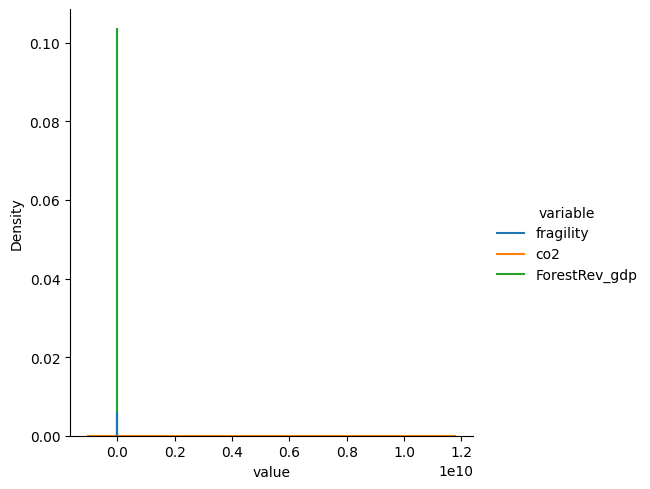

In [79]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.displot(pd.melt(theMapAndData[DataNames]),
            x="value", hue="variable",kind="kde",
            log_scale=(False,False))

In [80]:
# !pip install -U scikit-learn

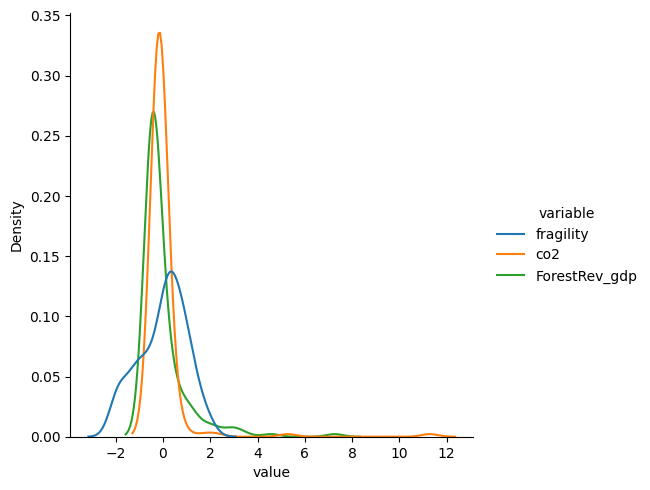

In [81]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
normalized_data = scaler.fit_transform(theMapAndData[DataNames])
sns.displot(pd.melt(pd.DataFrame(normalized_data,columns=DataNames)),
            x="value", hue="variable",kind="kde",
            log_scale=(False,False))

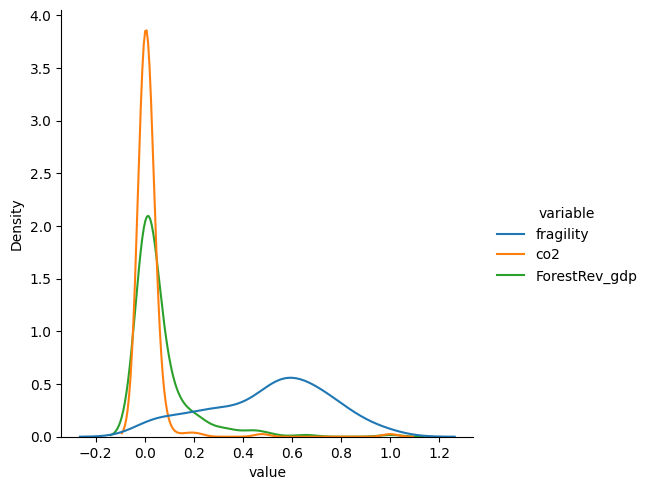

In [82]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data=scaler.fit_transform(theMapAndData[DataNames])

sns.displot(pd.melt(pd.DataFrame(scaled_data,columns=DataNames)),
            x="value", hue="variable",kind="kde",
            log_scale=(False,False))

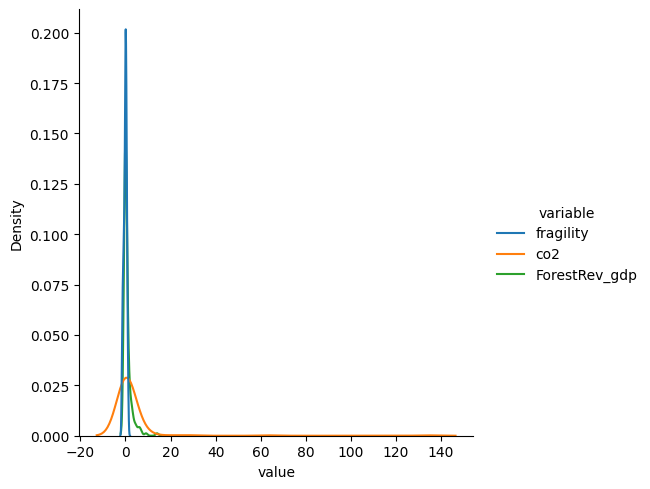

In [83]:
from sklearn.preprocessing import RobustScaler
scaler = RobustScaler()
robScaled_data = scaler.fit_transform(theMapAndData[DataNames])

sns.displot(pd.melt(pd.DataFrame(robScaled_data,columns=DataNames)),
            x="value", hue="variable",kind="kde",
            log_scale=(False,False))

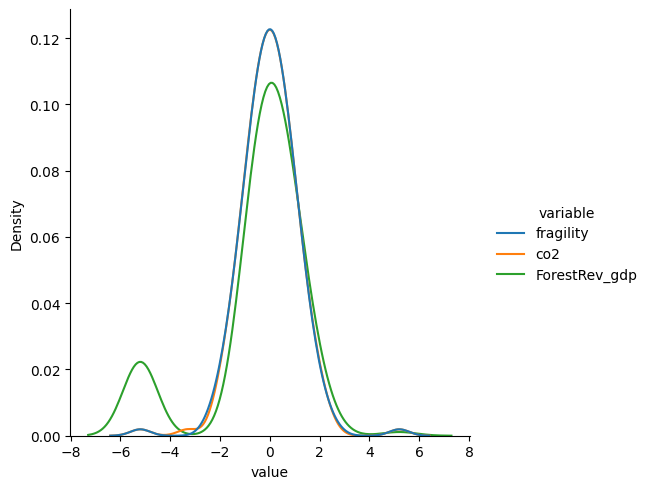

In [84]:
from sklearn.preprocessing import QuantileTransformer
scaler = QuantileTransformer(n_quantiles=99, random_state=0,output_distribution='normal') #or 'uniform'
QtScaled_data = scaler.fit_transform(theMapAndData[DataNames])

sns.displot(pd.melt(pd.DataFrame(QtScaled_data,columns=DataNames)),
            x="value", hue="variable",kind="kde",
            log_scale=(False,False))

In [85]:
theMapAndData['fragility_Qt']=QtScaled_data[:,0]

In [86]:
! pip show numba mapclassify numpy

Name: numba
Version: 0.60.0
Summary: compiling Python code using LLVM
Home-page: https://numba.pydata.org
Author: 
Author-email: 
License: BSD
Location: /usr/local/lib/python3.10/dist-packages
Requires: llvmlite, numpy
Required-by: cudf-cu12, librosa, rmm-cu12, shap
---
Name: numpy
Version: 1.26.4
Summary: Fundamental package for array computing in Python
Home-page: https://numpy.org
Author: Travis E. Oliphant et al.
Author-email: 
License: Copyright (c) 2005-2023, NumPy Developers.
        All rights reserved.
        
        Redistribution and use in source and binary forms, with or without
        modification, are permitted provided that the following conditions are
        met:
        
            * Redistributions of source code must retain the above copyright
               notice, this list of conditions and the following disclaimer.
        
            * Redistributions in binary form must reproduce the above
               copyright notice, this list of conditions and the 

In [88]:
! pip install mapclassify

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.1/59.1 kB 2.5 MB/s eta 0:00:00


In [89]:
import mapclassify
import numpy as np

np.random.seed(12345) # so we all get the same results!

# let's try 5 intervals
K=5
theVar=theMapAndData.fragility_Qt
# same interval width, easy interpretation
ei5 = mapclassify.EqualInterval(theVar, k=K)
# same interval width based on standard deviation, easy - but not as the previous one, poor when high skewness
msd = mapclassify.StdMean(theVar)
# interval width varies, counts per interval are close, not easy to grasp, repeated values complicate cuts
q5=mapclassify.Quantiles(theVar,k=K)

# based on similarity, good for multimodal data
mb5 = mapclassify.MaximumBreaks(theVar, k=K)
# based on similarity, good for skewed data
ht = mapclassify.HeadTailBreaks(theVar) # no K needed
# based on similarity, optimizer
fj5 = mapclassify.FisherJenks(theVar, k=K)
# based on similarity, optimizer
jc5 = mapclassify.JenksCaspall(theVar, k=K)
# based on similarity, optimizer
mp5 = mapclassify.MaxP(theVar, k=K)

In [90]:
class5 = ei5,msd, q5,mb5,  ht, fj5, jc5, mp5
# Collect ADCM for each classifier
fits = np.array([ c.adcm for c in class5])
# Convert ADCM scores to a DataFrame
adcms = pd.DataFrame(fits)
# Add classifier names
adcms['classifier'] = [c.name for c in class5]
# Add column names to the ADCM
adcms.columns = ['ADCM', 'Classifier']

<Axes: ylabel='Classifier'>

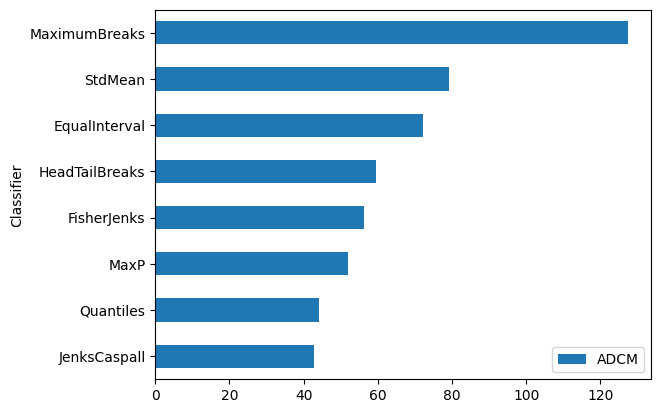

In [91]:
adcms.sort_values('ADCM').plot.barh(x='Classifier')

In [92]:
theMapAndData['fragility_Qt_jc5'] = jc5.yb

In [93]:
# there you are
theMapAndData[['fragility_Qt','fragility_Qt_jc5']].head()

,fragility_Qt,fragility_Qt_jc5
0,-0.530113,1
1,1.827146,4
2,0.304520,3
3,0.233695,2
4,-0.424447,1


In [94]:
indexList=['fragility_Qt_jc5'] # add more?
aggregator={'fragility_Qt': ['mean']}

pd.concat([theMapAndData[['fragility_Qt',col]].groupby(col,as_index=False).agg(aggregator) for col in indexList],axis=1)

,fragility_Qt_jc5,fragility_Qt
,,mean
0,0,-1.685317
1,1,-0.652170
2,2,-0.006005
3,3,0.614405
4,4,1.618874


In [95]:
# renaming
newLabelsForLevels={0:"0_Great", 1:"1_Good", 2:"2_Middle", 3:"3_Bad", 4:"4_Poor"}

theMapAndData['fragility_Qt_jc5_cat']=theMapAndData.loc[:,'fragility_Qt_jc5'].replace(newLabelsForLevels)

# we have
theMapAndData[['fragility_Qt','fragility_Qt_jc5','fragility_Qt_jc5_cat']].head(20)

,fragility_Qt,fragility_Qt_jc5,fragility_Qt_jc5_cat
0,-0.530113,1,1_Good
1,1.827146,4,4_Poor
2,0.304520,3,3_Bad
3,0.233695,2,2_Middle
4,-0.424447,1,1_Good
5,-0.179018,2,2_Middle
6,0.963642,3,3_Bad
7,-0.760554,1,1_Good
8,-1.963511,0,0_Great
9,-1.436341,0,0_Great


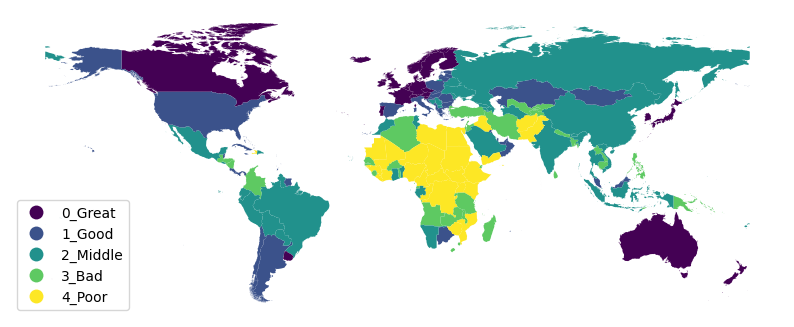

In [96]:
import matplotlib.pyplot as plt

f, ax = plt.subplots(1, figsize=(10, 10))
theMapAndData.plot(column='fragility_Qt_jc5_cat', # variable to plot
                   cmap='viridis', # set of colors
                   categorical=True, # can be interpreted as category
                   edgecolor='white', # border color
                   linewidth=0., # width of border
                   alpha=1, # level of transparency (0 is invisible)
                   legend=True, # need a legend?
                   # location of legend: 'best', 'upper right', 'upper left', 'lower left',
                   # 'lower right', 'right', 'center left', 'center right',
                   # 'lower center', 'upper center', 'center'
                   legend_kwds={'loc':"lower left"},
        ax=ax
       )

ax.set_axis_off()

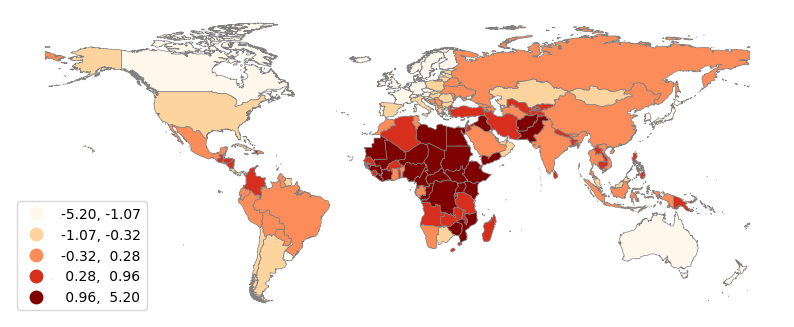

In [97]:
import matplotlib.pyplot as plt

f, ax = plt.subplots(1, figsize=(10, 10))
theMapAndData.plot(column='fragility_Qt',
                   cmap='OrRd',
                   scheme="jenkscaspall",k=5,
        edgecolor='grey',
        linewidth=0.5,
        alpha=1,
        legend=True,
        legend_kwds={'loc':3},
        ax=ax
       )

ax.set_axis_off()

In [98]:
# finally

theMapAndData.to_file(os.path.join("maps","worldMaps.gpkg"), layer='indicators', driver="GPKG")

# EJERCICIO 5

In [99]:
import os, geopandas as gpd

linkCountries = "https://github.com/in-Sinergy/mapasPractice/raw/main/World_Countries/World_Countries.shp"

countries=gpd.read_file(linkCountries)

In [100]:
#opening the other files
linkRivers = "https://github.com/davasquezm/introgeodf/raw/refs/heads/main/maps/World_Hydrography.shp"
linkCities = "https://github.com/davasquezm/introgeodf/raw/refs/heads/main/maps/World_Cities.shp"

cities=gpd.read_file(linkCities)
rivers=gpd.read_file(linkRivers)

<Axes: >

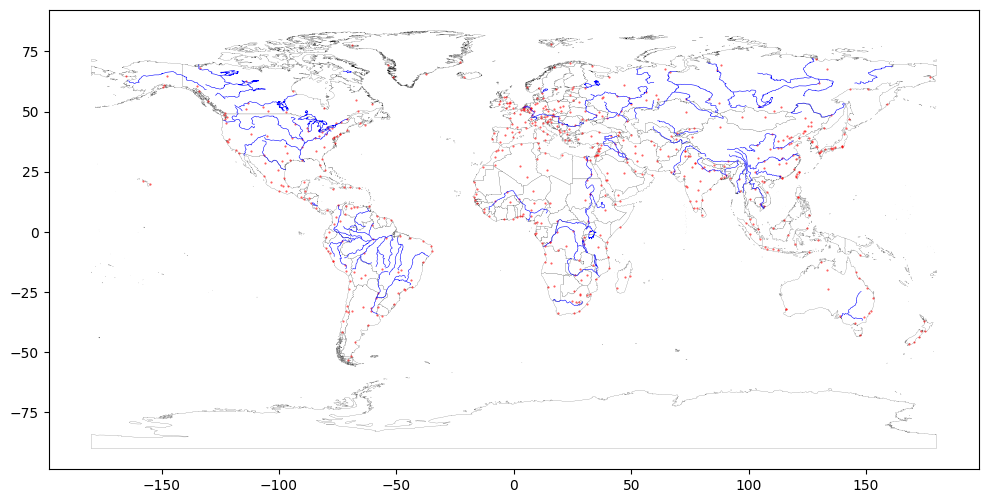

In [101]:
base = countries.plot(facecolor="white",
                      edgecolor='black',
                      linewidth=0.1,
                      figsize=(12,12))

rivers.plot(edgecolor='blue', linewidth=0.4,
            ax=base)
cities.plot(marker='.', color='red', markersize=1,alpha=0.7,
            ax=base)

In [102]:
countries.to_file(os.path.join("maps","worldMaps.gpkg"), layer='countries', driver="GPKG")
rivers.to_file(os.path.join("maps","worldMaps.gpkg"), layer='rivers', driver="GPKG")
cities.to_file(os.path.join("maps","worldMaps.gpkg"), layer='cities', driver="GPKG")

In [103]:
#adding cia data
import pandas as pd

fragilityCiaLink="https://github.com/CienciaDeDatosEspacial/merging/raw/main/FragilityCia_isos.csv"

fragilityCia=pd.read_csv(fragilityCiaLink)

In [104]:
countries['COUNTRY']=countries.COUNTRY.str.upper()

In [105]:
onlyFragilCia=set(fragilityCia.Country)- set(countries.COUNTRY)
onlyMap=set(countries.COUNTRY)- set(fragilityCia.Country)

In [106]:
!pip install thefuzz

In [107]:
from thefuzz import process

[(country, process.extractOne(country,onlyMap)) for country in sorted(onlyFragilCia)]
[(country, process.extractOne(country,onlyMap)) for country in sorted(onlyFragilCia)
 if process.extractOne(country,onlyMap)[1]>=90]
try1={country: process.extractOne(country,onlyMap)[0] for country in sorted(onlyFragilCia)
 if process.extractOne(country,onlyMap)[1]>=90}

In [108]:
fragilityCia.replace(to_replace={'Country':try1},inplace=True)

# updating
onlyFragilCia=set(fragilityCia.Country)- set(countries.COUNTRY)
onlyMap=set(countries.COUNTRY)- set(fragilityCia.Country)
# new matches
[(country, process.extractOne(country,onlyMap)) for country in sorted(onlyFragilCia)]
countries[countries.COUNTRY.str.contains('LAO|ESW|SWA')]
manualChanges={'SWAZILAND':'ESWATINI','LAOS':"LAO PEOPLE'S DEMOCRATIC REPUBLIC (THE)"}

countries.replace(to_replace={'COUNTRY':manualChanges},inplace=True)

# updating
onlyFragilCia=set(fragilityCia.Country)- set(countries.COUNTRY)
onlyMap=set(countries.COUNTRY)- set(fragilityCia.Country)
# new matches
[(country, process.extractOne(country,onlyMap)) for country in sorted(onlyFragilCia)]

# then:
try2={country: process.extractOne(country,onlyMap)[0] for country in sorted(onlyFragilCia)}

# changing
fragilityCia.replace(to_replace={'Country':try2},inplace=True)

# new update
onlyFragilCia=set(fragilityCia.Country)- set(countries.COUNTRY)
onlyMap=set(countries.COUNTRY)- set(fragilityCia.Country)

# new matches
[(country, process.extractOne(country,onlyMap)) for country in sorted(onlyFragilCia)]

[]

In [109]:
theMapAndData=countries.merge(fragilityCia,left_on='COUNTRY', right_on='Country')

theMapAndData.drop(columns=['Country'],inplace=True) # no need for this column

In [110]:
DataNames=['fragility', 'co2', 'ForestRev_gdp']
pd.melt(theMapAndData[DataNames])
import seaborn as sns
import matplotlib.pyplot as plt

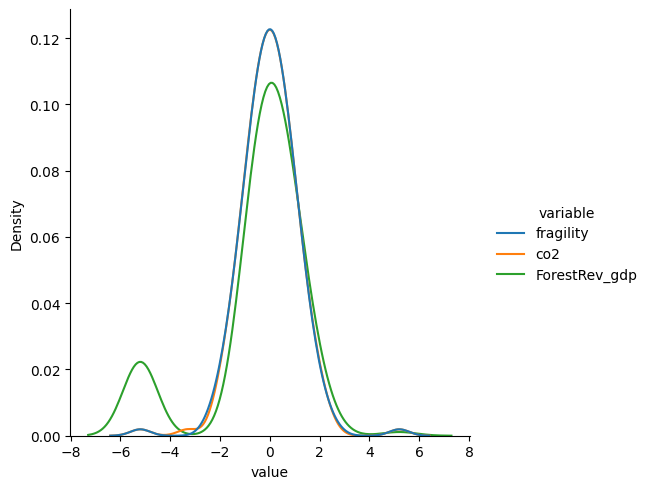

In [111]:
from sklearn.preprocessing import QuantileTransformer
scaler = QuantileTransformer(n_quantiles=99, random_state=0,output_distribution='normal') #or 'uniform'
QtScaled_data = scaler.fit_transform(theMapAndData[DataNames])

sns.displot(pd.melt(pd.DataFrame(QtScaled_data,columns=DataNames)),
            x="value", hue="variable",kind="kde",
            log_scale=(False,False))

In [112]:
theMapAndData['fragility_Qt']=QtScaled_data[:,0]

In [113]:
! pip install mapclassify

In [114]:
import mapclassify
import numpy as np

np.random.seed(12345) # so we all get the same results!

# let's try 5 intervals
K=5
theVar=theMapAndData.fragility_Qt
# same interval width, easy interpretation
ei5 = mapclassify.EqualInterval(theVar, k=K)
# same interval width based on standard deviation, easy - but not as the previous one, poor when high skewness
msd = mapclassify.StdMean(theVar)
# interval width varies, counts per interval are close, not easy to grasp, repeated values complicate cuts
q5=mapclassify.Quantiles(theVar,k=K)

# based on similarity, good for multimodal data
mb5 = mapclassify.MaximumBreaks(theVar, k=K)
# based on similarity, good for skewed data
ht = mapclassify.HeadTailBreaks(theVar) # no K needed
# based on similarity, optimizer
fj5 = mapclassify.FisherJenks(theVar, k=K)
# based on similarity, optimizer
jc5 = mapclassify.JenksCaspall(theVar, k=K)
# based on similarity, optimizer
mp5 = mapclassify.MaxP(theVar, k=K)

<Axes: ylabel='Classifier'>

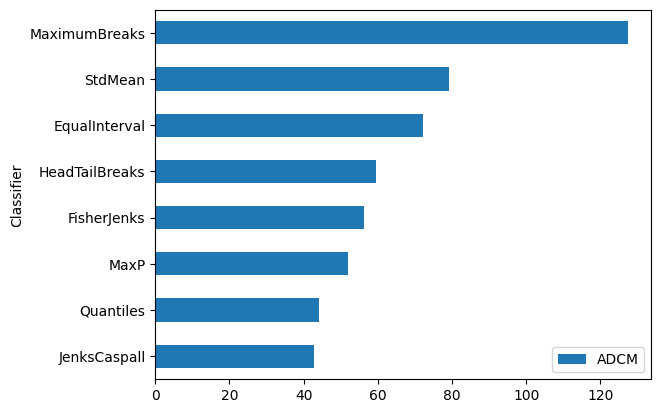

In [115]:
##comparing wit ACDM
class5 = ei5,msd, q5,mb5,  ht, fj5, jc5, mp5
# Collect ADCM for each classifier
fits = np.array([ c.adcm for c in class5])
# Convert ADCM scores to a DataFrame
adcms = pd.DataFrame(fits)
# Add classifier names
adcms['classifier'] = [c.name for c in class5]
# Add column names to the ADCM
adcms.columns = ['ADCM', 'Classifier']
adcms.sort_values('ADCM').plot.barh(x='Classifier')

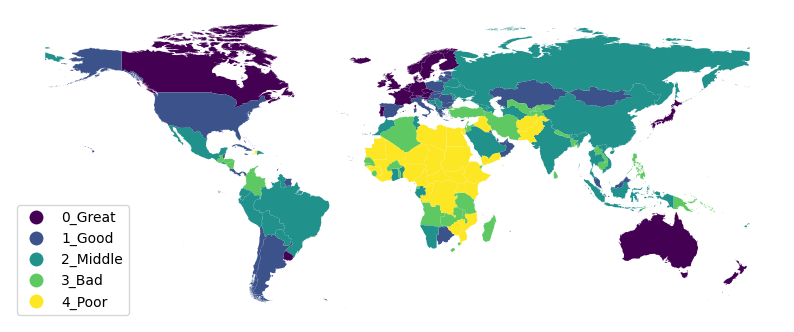

In [116]:
theMapAndData['fragility_Qt_jc5'] = jc5.yb
indexList=['fragility_Qt_jc5']
aggregator={'fragility_Qt': ['mean']}

pd.concat([theMapAndData[['fragility_Qt',col]].groupby(col,as_index=False).agg(aggregator) for col in indexList],axis=1)
# renaming
newLabelsForLevels={0:"0_Great", 1:"1_Good", 2:"2_Middle", 3:"3_Bad", 4:"4_Poor"}

theMapAndData['fragility_Qt_jc5_cat']=theMapAndData.loc[:,'fragility_Qt_jc5'].replace(newLabelsForLevels)
import matplotlib.pyplot as plt

f, ax = plt.subplots(1, figsize=(10, 10))
theMapAndData.plot(column='fragility_Qt_jc5_cat', # variable to plot
                   cmap='viridis', # set of colors ##buscar en brewercolors
                   categorical=True, # can be interpreted as category
                   edgecolor='white', # border color
                   linewidth=0., # width of border
                   alpha=1, # level of transparency (0 is invisible)
                   legend=True, # need a legend?
                   # location of legend: 'best', 'upper right', 'upper left', 'lower left',
                   # 'lower right', 'right', 'center left', 'center right',
                   # 'lower center', 'upper center', 'center'
                   legend_kwds={'loc':"lower left"},
        ax=ax
       )

ax.set_axis_off()

In [117]:
theMapAndData.to_file(os.path.join("maps","worldMaps.gpkg"), layer='indicators', driver="GPKG")

In [118]:
#transforming CO2 and Forest
theMapAndData['co2_Qt']=QtScaled_data[:,1]
theMapAndData['forest_Qt']=QtScaled_data[:,2]

In [119]:
np.random.seed(12345)
K=5
theVar=theMapAndData.co2_Qt
# same interval width, easy interpretation
ei5 = mapclassify.EqualInterval(theVar, k=K)
# same interval width based on standard deviation, easy - but not as the previous one, poor when high skewness
msd = mapclassify.StdMean(theVar)
# interval width varies, counts per interval are close, not easy to grasp, repeated values complicate cuts
q5=mapclassify.Quantiles(theVar,k=K)

# based on similarity, good for multimodal data
mb5 = mapclassify.MaximumBreaks(theVar, k=K)
# based on similarity, good for skewed data
ht = mapclassify.HeadTailBreaks(theVar) # no K needed
# based on similarity, optimizer
fj5 = mapclassify.FisherJenks(theVar, k=K)
# based on similarity, optimizer
jc5 = mapclassify.JenksCaspall(theVar, k=K)
# based on similarity, optimizer
mp5 = mapclassify.MaxP(theVar, k=K)

<Axes: ylabel='Classifier'>

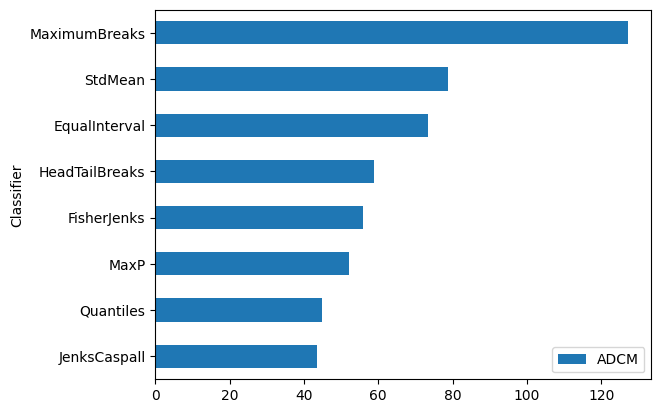

In [120]:
class5 = ei5,msd, q5,mb5,  ht, fj5, jc5, mp5
# Collect ADCM for each classifier
fits = np.array([ c.adcm for c in class5])
# Convert ADCM scores to a DataFrame
adcms = pd.DataFrame(fits)
# Add classifier names
adcms['classifier'] = [c.name for c in class5]
# Add column names to the ADCM
adcms.columns = ['ADCM', 'Classifier']
adcms.sort_values('ADCM').plot.barh(x='Classifier')

In [121]:
theMapAndData['co2_Qt_jc5'] = jc5.yb

In [122]:
theMapAndData[['co2_Qt','co2_Qt_jc5']].head()

,co2_Qt,co2_Qt_jc5
0,-1.417436,0
1,-0.312096,1
2,0.903225,3
3,0.282063,2
4,-0.757475,1


In [123]:
indexList=['co2_Qt_jc5']
aggregator={'co2_Qt': ['mean']}

pd.concat([theMapAndData[['co2_Qt',col]].groupby(col,as_index=False).agg(aggregator) for col in indexList],axis=1)

,co2_Qt_jc5,co2_Qt
,,mean
0,0,-1.663108
1,1,-0.623926
2,2,0.014829
3,3,0.640064
4,4,1.630121


In [124]:
# renaming
newLabelsForLevels={0:"0_v_Low", 1:"1_Low", 2:"2_Medium", 3:"3_High", 4:"4_v_High"}

theMapAndData['co2_Qt_jc5_cat']=theMapAndData.loc[:,'co2_Qt_jc5'].replace(newLabelsForLevels)

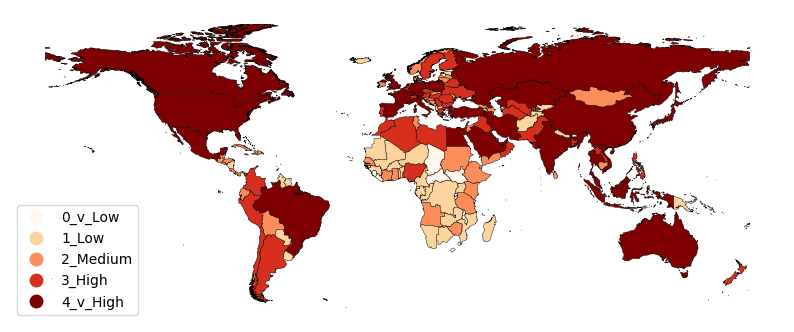

In [125]:
import matplotlib.pyplot as plt

f, ax = plt.subplots(1, figsize=(10, 10))
theMapAndData.plot(column='co2_Qt_jc5_cat', # variable to plot
                   cmap='OrRd', # set of colors ##buscar en brewercolors
                   categorical=True, # can be interpreted as category
                   edgecolor='black', # border color
                   linewidth=0.3, # width of border
                   alpha=1, # level of transparency (0 is invisible)
                   legend=True, # need a legend?
                   # location of legend: 'best', 'upper right', 'upper left', 'lower left',
                   # 'lower right', 'right', 'center left', 'center right',
                   # 'lower center', 'upper center', 'center'
                   legend_kwds={'loc':"lower left"},
        ax=ax
       )

ax.set_axis_off()

In [126]:
theMapAndData.to_file(os.path.join("maps","worldMaps.gpkg"), layer='co2', driver="GPKG")

**forest**

In [127]:
np.random.seed(12345)
K=5
theVar=theMapAndData.forest_Qt
# same interval width, easy interpretation
ei5 = mapclassify.EqualInterval(theVar, k=K)
# same interval width based on standard deviation, easy - but not as the previous one, poor when high skewness
msd = mapclassify.StdMean(theVar)
# interval width varies, counts per interval are close, not easy to grasp, repeated values complicate cuts
q5=mapclassify.Quantiles(theVar,k=K)

# based on similarity, good for multimodal data
mb5 = mapclassify.MaximumBreaks(theVar, k=K)
# based on similarity, good for skewed data
ht = mapclassify.HeadTailBreaks(theVar) # no K needed
# based on similarity, optimizer
fj5 = mapclassify.FisherJenks(theVar, k=K)
# based on similarity, optimizer
jc5 = mapclassify.JenksCaspall(theVar, k=K)
# based on similarity, optimizer
mp5 = mapclassify.MaxP(theVar, k=K)

<Axes: ylabel='Classifier'>

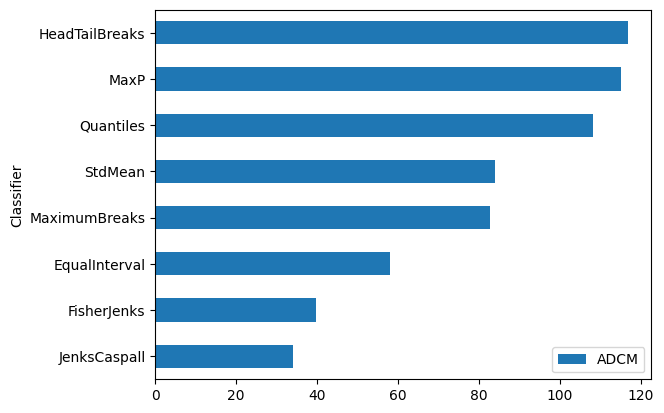

In [128]:
class5 = ei5,msd, q5,mb5,  ht, fj5, jc5, mp5
# Collect ADCM for each classifier
fits = np.array([ c.adcm for c in class5])
# Convert ADCM scores to a DataFrame
adcms = pd.DataFrame(fits)
# Add classifier names
adcms['classifier'] = [c.name for c in class5]
# Add column names to the ADCM
adcms.columns = ['ADCM', 'Classifier']
adcms.sort_values('ADCM').plot.barh(x='Classifier')

In [129]:
theMapAndData['forest_Qt_jc5'] = jc5.yb
theMapAndData[['forest_Qt','forest_Qt_jc5']].head()

,forest_Qt,forest_Qt_jc5
0,-5.199338,0
1,-0.076809,2
2,-0.352465,2
3,-0.827130,1
4,-0.106447,2


In [130]:
indexList=['forest_Qt_jc5']
aggregator={'forest_Qt': ['mean']}

pd.concat([theMapAndData[['forest_Qt',col]].groupby(col,as_index=False).agg(aggregator) for col in indexList],axis=1)

,forest_Qt_jc5,forest_Qt
,,mean
0,0,-5.199338
1,1,-0.762467
2,2,-0.050787
3,3,0.635412
4,4,1.657795


In [131]:
# renaming
newLabelsForLevels={0:"0_v_Low", 1:"1_Low", 2:"2_Medium", 3:"3_High", 4:"4_v_High"}

theMapAndData['forest_Qt_jc5_cat']=theMapAndData.loc[:,'forest_Qt_jc5'].replace(newLabelsForLevels)

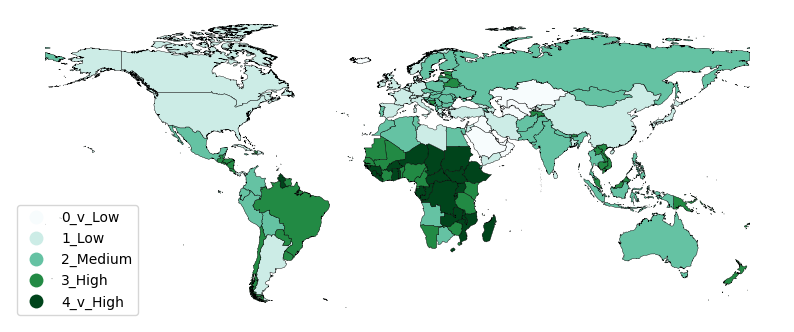

In [132]:
import matplotlib.pyplot as plt

f, ax = plt.subplots(1, figsize=(10, 10))
theMapAndData.plot(column='forest_Qt_jc5_cat', # variable to plot
                   cmap='BuGn', # set of colors ##buscar en brewercolors
                   categorical=True, # can be interpreted as category
                   edgecolor='black', # border color
                   linewidth=0.3, # width of border
                   alpha=1, # level of transparency (0 is invisible)
                   legend=True, # need a legend?
                   # location of legend: 'best', 'upper right', 'upper left', 'lower left',
                   # 'lower right', 'right', 'center left', 'center right',
                   # 'lower center', 'upper center', 'center'
                   legend_kwds={'loc':"lower left"},
        ax=ax
       )

ax.set_axis_off()

In [133]:
theMapAndData.to_file(os.path.join("maps","worldMaps.gpkg"), layer='forest', driver="GPKG")

**NEW VARIABLE**

In [134]:
linkPBI = "https://github.com/in-Sinergy/mapasPractice/raw/main/Real%20GDP%20per%20capita.csv"
PBI=pd.read_csv(linkPBI)

In [135]:
PBI.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 224 entries, 0 to 223
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   name                 224 non-null    object
 1   slug                 224 non-null    object
 2   value                224 non-null    object
 3   date_of_information  224 non-null    int64 
 4   ranking              224 non-null    int64 
 5   region               224 non-null    object
dtypes: int64(2), object(4)
memory usage: 10.6+ KB


In [136]:
#colocando los países en mayúscula
PBI['Country']= PBI.name.str.upper()

In [137]:
PBI.drop(columns='name', inplace=True)
PBI

,slug,value,date_of_information,ranking,region,Country
0,liechtenstein,"$139,100",2009,1,Europe,LIECHTENSTEIN
1,luxembourg,"$117,700",2022,2,Europe,LUXEMBOURG
2,monaco,"$115,700",2015,3,Europe,MONACO
3,ireland,"$112,400",2022,4,Europe,IRELAND
4,singapore,"$108,000",2022,5,East and Southeast Asia,SINGAPORE
...,...,...,...,...,...,...
219,mozambique,"$1,300",2022,220,Africa,MOZAMBIQUE
220,niger,"$1,300",2022,221,Africa,NIGER
221,congo-democratic-republic-of-the,"$1,100",2022,222,Africa,"CONGO, DEMOCRATIC REPUBLIC OF THE"
222,central-african-republic,$800,2022,223,Africa,CENTRAL AFRICAN REPUBLIC


In [138]:
#arreglando la columna de value para que sea solo el valor numérico
PBI['value']=PBI.value.str.replace(pat=',',repl='', regex=True)

In [139]:
PBI['value']=PBI.value.str.extract(pat=r'(\d+)',expand=True)

In [140]:
PBI['value']=pd.to_numeric(PBI.value)

In [141]:
#una vez listo, se hace el merge con el database principal
onlyPBI=set(PBI.Country)- set(countries.COUNTRY)
onlyMap=set(countries.COUNTRY)- set(PBI.Country)

In [142]:
[(country, process.extractOne(country,onlyMap)) for country in sorted(onlyPBI)
  if process.extractOne(country,onlyMap)[1]>=90]

[('AMERICAN SAMOA', ('AMERICAN SAMOA (US)', 95)),
 ('ARUBA', ('ARUBA (NETHERLANDS)', 90)),
 ('BAHAMAS, THE', ('BAHAMAS', 90)),
 ('BERMUDA', ('BERMUDA (UK)', 90)),
 ('BRITISH VIRGIN ISLANDS', ('BRITISH VIRGIN ISLANDS(UK)', 95)),
 ('CAYMAN ISLANDS', ('CAYMAN ISLANDS (UK)', 95)),
 ('CONGO, DEMOCRATIC REPUBLIC OF THE',
  ('DEMOCRATIC REPUBLIC OF THE CONGO', 95)),
 ('CONGO, REPUBLIC OF THE', ('DEMOCRATIC REPUBLIC OF THE CONGO', 95)),
 ('COOK ISLANDS', ('COOK ISLANDS (NEW ZEALAND)', 90)),
 ('CURACAO', ('CURACAO (NETHERLANDS)', 90)),
 ('FAROE ISLANDS', ('FAROE ISLANDS (DENMARK)', 90)),
 ('FRENCH POLYNESIA', ('FRENCH POLYNESIA (FRANCE)', 90)),
 ('GAMBIA, THE', ('GAMBIA', 90)),
 ('GIBRALTAR', ('GIBRALTAR (UK)', 95)),
 ('GREENLAND', ('GREENLAND (DENMARK)', 90)),
 ('GUAM', ('GUAM (US)', 90)),
 ('GUERNSEY', ('GUERNSEY (UK)', 90)),
 ('ISLE OF MAN', ('ISLE OF MAN (UK)', 95)),
 ('JERSEY', ('JERSEY (UK)', 90)),
 ('KOREA, NORTH', ('NORTH KOREA', 95)),
 ('KOREA, SOUTH', ('SOUTH KOREA', 95)),
 ('MICRONES

In [143]:
try1={country: process.extractOne(country,onlyMap)[0] for country in sorted(onlyPBI)
 if process.extractOne(country,onlyMap)[1]>=90}
try1

{'AMERICAN SAMOA': 'AMERICAN SAMOA (US)',
 'ARUBA': 'ARUBA (NETHERLANDS)',
 'BAHAMAS, THE': 'BAHAMAS',
 'BERMUDA': 'BERMUDA (UK)',
 'BRITISH VIRGIN ISLANDS': 'BRITISH VIRGIN ISLANDS(UK)',
 'CAYMAN ISLANDS': 'CAYMAN ISLANDS (UK)',
 'CONGO, DEMOCRATIC REPUBLIC OF THE': 'DEMOCRATIC REPUBLIC OF THE CONGO',
 'CONGO, REPUBLIC OF THE': 'DEMOCRATIC REPUBLIC OF THE CONGO',
 'COOK ISLANDS': 'COOK ISLANDS (NEW ZEALAND)',
 'CURACAO': 'CURACAO (NETHERLANDS)',
 'FAROE ISLANDS': 'FAROE ISLANDS (DENMARK)',
 'FRENCH POLYNESIA': 'FRENCH POLYNESIA (FRANCE)',
 'GAMBIA, THE': 'GAMBIA',
 'GIBRALTAR': 'GIBRALTAR (UK)',
 'GREENLAND': 'GREENLAND (DENMARK)',
 'GUAM': 'GUAM (US)',
 'GUERNSEY': 'GUERNSEY (UK)',
 'ISLE OF MAN': 'ISLE OF MAN (UK)',
 'JERSEY': 'JERSEY (UK)',
 'KOREA, NORTH': 'NORTH KOREA',
 'KOREA, SOUTH': 'SOUTH KOREA',
 'MICRONESIA, FEDERATED STATES OF': 'FEDERATED STATES OF MICRONESIA',
 'MONTSERRAT': 'MONTSERRAT (UK)',
 'NEW CALEDONIA': 'NEW CALEDONIA (FRANCE)',
 'NIUE': 'NIUE (NEW ZEALAND)',
 '

In [144]:
PBI.replace(to_replace={'Country':try1},inplace=True)

# updating
onlyPBI=set(PBI.Country)- set(countries.COUNTRY)
onlyMap=set(countries.COUNTRY)- set(PBI.Country)
# new matches
[(country, process.extractOne(country,onlyMap)) for country in sorted(onlyPBI)]

[('BURMA', ('COCOS (KEELING) ISLANDS (AUSTRALIA)', 54)),
 ('CABO VERDE', ('CAPE VERDE', 80)),
 ("COTE D'IVOIRE", ('IVORY COAST', 63)),
 ('CZECHIA', ('CZECH REPUBLIC', 75)),
 ('FALKLAND ISLANDS (ISLAS MALVINAS)', ('PITCAIRN ISLANDS (UK)', 86)),
 ('GAZA STRIP', ('COCOS (KEELING) ISLANDS (AUSTRALIA)', 48)),
 ('HONG KONG', ('CONGO', 68)),
 ('KOSOVO', ('JOHNSTON ATOLL (US)', 45)),
 ('LAOS', ("LAO PEOPLE'S DEMOCRATIC REPUBLIC (THE)", 51)),
 ('MACAU', ("LAO PEOPLE'S DEMOCRATIC REPUBLIC (THE)", 54)),
 ('SAINT LUCIA', ('ST. LUCIA', 80)),
 ('SINT MAARTEN', ('MYANMAR', 62)),
 ('TIMOR-LESTE', ('EAST TIMOR', 81)),
 ('WEST BANK', ('WESTERN SAHARA', 57))]

In [145]:
#cambios manuales
countries[countries.COUNTRY.str.contains('MYA|LAO|FALK|PAL')]
manualChanges={'MYANMAR':'BURMA','LAOS':"LAO PEOPLE'S DEMOCRATIC REPUBLIC (THE)", 'FALKLAND ISLANDS (UK)':'FALKLAND ISLANDS (ISLAS MALVINAS)',
               'GAZA': 'GAZA STRIP'}

In [146]:
countries.replace(to_replace={'COUNTRY':manualChanges},inplace=True)
onlyPBI=set(PBI.Country)- set(countries.COUNTRY)
onlyMap=set(countries.COUNTRY)- set(PBI.Country)
# new matches
[(country, process.extractOne(country,onlyMap)) for country in sorted(onlyPBI)]

[('CABO VERDE', ('CAPE VERDE', 80)),
 ("COTE D'IVOIRE", ('IVORY COAST', 63)),
 ('CZECHIA', ('CZECH REPUBLIC', 75)),
 ('GAZA STRIP', ('COCOS (KEELING) ISLANDS (AUSTRALIA)', 48)),
 ('HONG KONG', ('CONGO', 68)),
 ('KOSOVO', ('JOHNSTON ATOLL (US)', 45)),
 ('LAOS', ("LAO PEOPLE'S DEMOCRATIC REPUBLIC (THE)", 51)),
 ('MACAU', ("LAO PEOPLE'S DEMOCRATIC REPUBLIC (THE)", 54)),
 ('SAINT LUCIA', ('ST. LUCIA', 80)),
 ('SINT MAARTEN', ('ST. PIERRE AND MIQUELON (FRANCE)', 50)),
 ('TIMOR-LESTE', ('EAST TIMOR', 81)),
 ('WEST BANK', ('WESTERN SAHARA', 57))]

In [147]:
try2={country: process.extractOne(country,onlyMap)[0] for country in sorted(onlyPBI)}
try2

{'CABO VERDE': 'CAPE VERDE',
 "COTE D'IVOIRE": 'IVORY COAST',
 'CZECHIA': 'CZECH REPUBLIC',
 'GAZA STRIP': 'COCOS (KEELING) ISLANDS (AUSTRALIA)',
 'HONG KONG': 'CONGO',
 'KOSOVO': 'JOHNSTON ATOLL (US)',
 'LAOS': "LAO PEOPLE'S DEMOCRATIC REPUBLIC (THE)",
 'MACAU': "LAO PEOPLE'S DEMOCRATIC REPUBLIC (THE)",
 'SAINT LUCIA': 'ST. LUCIA',
 'SINT MAARTEN': 'ST. PIERRE AND MIQUELON (FRANCE)',
 'TIMOR-LESTE': 'EAST TIMOR',
 'WEST BANK': 'WESTERN SAHARA'}

In [148]:
# changing
PBI.replace(to_replace={'Country':try2},inplace=True)

MERGING

In [149]:
theMapAndData=countries.merge(PBI,left_on='COUNTRY', right_on='Country')

theMapAndData.drop(columns=['Country'],inplace=True) # no need for this column
# here it is (new map):
theMapAndData.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 224 entries, 0 to 223
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   COUNTRY              224 non-null    object  
 1   geometry             224 non-null    geometry
 2   slug                 224 non-null    object  
 3   value                224 non-null    int64   
 4   date_of_information  224 non-null    int64   
 5   ranking              224 non-null    int64   
 6   region               224 non-null    object  
dtypes: geometry(1), int64(3), object(3)
memory usage: 12.4+ KB


In [150]:
theMapAndData.rename(columns = {'value':'PBI_val'}, inplace = True)

In [153]:
DataNames=['PBI_val']
pd.melt(theMapAndData[DataNames])

,variable,value
0,PBI_val,41300
1,PBI_val,22300
2,PBI_val,1500
3,PBI_val,11200
4,PBI_val,15100
...,...,...
219,PBI_val,2200
220,PBI_val,1600
221,PBI_val,12400
222,PBI_val,3900


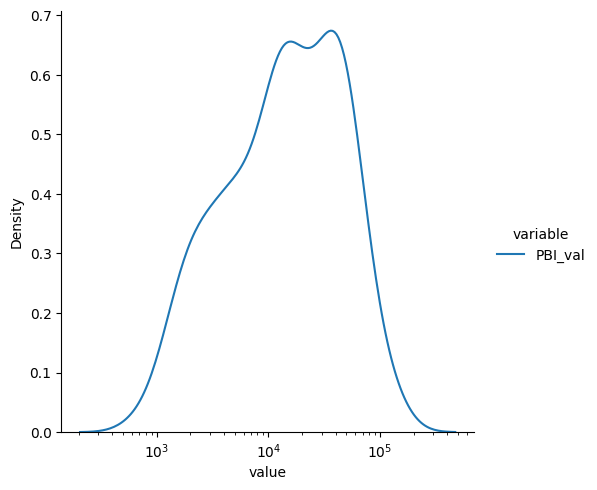

In [154]:
sns.displot(pd.melt(theMapAndData[DataNames]),
            x="value", hue="variable",kind="kde",
            log_scale=(True,False))

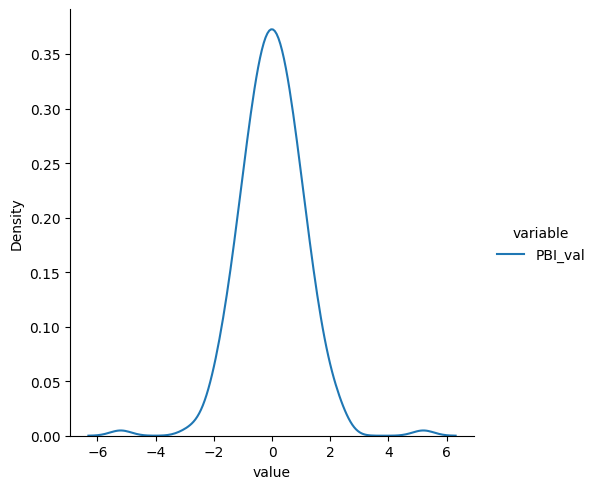

In [155]:
from sklearn.preprocessing import QuantileTransformer ##para datos con dms atípicos. Los transforma para que no influyan
scaler = QuantileTransformer(n_quantiles=99, random_state=0,output_distribution='normal') #or 'uniform'
QtScaled_data = scaler.fit_transform(theMapAndData[DataNames])

sns.displot(pd.melt(pd.DataFrame(QtScaled_data,columns=DataNames)),
            x="value", hue="variable",kind="kde",
            log_scale=(False,False))

In [156]:
theMapAndData['PBI_Qt']=QtScaled_data[:,0]

In [157]:
np.random.seed(12345) # so we all get the same results!

# let's try 5 intervals
K=5
theVar=theMapAndData.PBI_Qt
# same interval width, easy interpretation
ei5 = mapclassify.EqualInterval(theVar, k=K)
# same interval width based on standard deviation, easy - but not as the previous one, poor when high skewness
msd = mapclassify.StdMean(theVar)
# interval width varies, counts per interval are close, not easy to grasp, repeated values complicate cuts
q5=mapclassify.Quantiles(theVar,k=K)

# based on similarity, good for multimodal data
mb5 = mapclassify.MaximumBreaks(theVar, k=K)
# based on similarity, good for skewed data
ht = mapclassify.HeadTailBreaks(theVar) # no K needed
# based on similarity, optimizer
fj5 = mapclassify.FisherJenks(theVar, k=K)
# based on similarity, optimizer
jc5 = mapclassify.JenksCaspall(theVar, k=K)
# based on similarity, optimizer
mp5 = mapclassify.MaxP(theVar, k=K)

<Axes: ylabel='Classifier'>

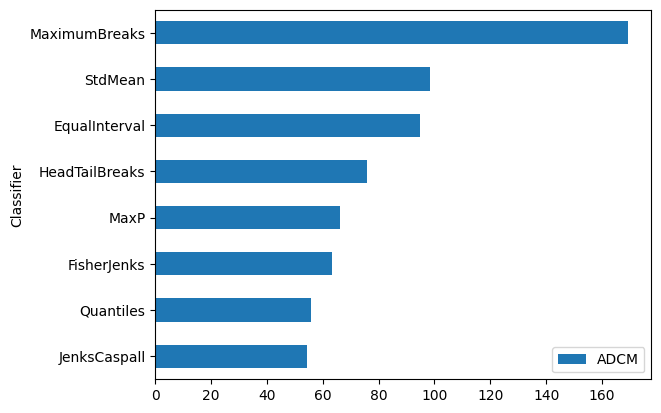

In [158]:
class5 = ei5,msd, q5,mb5,  ht, fj5, jc5, mp5
# Collect ADCM for each classifier
fits = np.array([ c.adcm for c in class5])
# Convert ADCM scores to a DataFrame
adcms = pd.DataFrame(fits)
# Add classifier names
adcms['classifier'] = [c.name for c in class5]
# Add column names to the ADCM
adcms.columns = ['ADCM', 'Classifier']
adcms.sort_values('ADCM').plot.barh(x='Classifier')

In [159]:
theMapAndData['PBI_Qt_jc5'] = jc5.yb

In [160]:
indexList=['PBI_Qt_jc5']
aggregator={'PBI_Qt': ['mean']}

pd.concat([theMapAndData[['PBI_Qt',col]].groupby(col,as_index=False).agg(aggregator) for col in indexList],axis=1)

,PBI_Qt_jc5,PBI_Qt
,,mean
0,0,-1.537548
1,1,-0.577404
2,2,0.027795
3,3,0.656451
4,4,1.630204


In [161]:
# renaming
newLabelsForLevels={0:"0_VBad", 1:"1_Bad", 2:"2_Regular", 3:"3_Good", 4:"4_Great"}

theMapAndData['PBI_Qt_jc5_cat']=theMapAndData.loc[:,'PBI_Qt_jc5'].replace(newLabelsForLevels) #categorica

# we have
theMapAndData[['PBI_Qt','PBI_Qt_jc5','PBI_Qt_jc5_cat']].head()

,PBI_Qt,PBI_Qt_jc5,PBI_Qt_jc5_cat
0,0.801583,3,3_Good
1,0.289846,2,2_Regular
2,-1.741291,0,0_VBad
3,-0.258633,2,2_Regular
4,0.025581,2,2_Regular


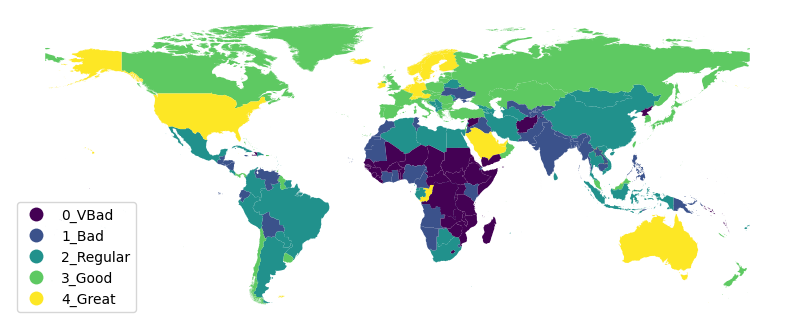

In [162]:
f, ax = plt.subplots(1, figsize=(10, 10))
theMapAndData.plot(column='PBI_Qt_jc5_cat', # variable to plot
                   cmap='viridis', # set of colors ##buscar en brewercolors
                   categorical=True, # can be interpreted as category
                   edgecolor='white', # border color
                   linewidth=0., # width of border
                   alpha=1, # level of transparency (0 is invisible)
                   legend=True, # need a legend?
                   # location of legend: 'best', 'upper right', 'upper left', 'lower left',
                   # 'lower right', 'right', 'center left', 'center right',
                   # 'lower center', 'upper center', 'center'
                   legend_kwds={'loc':"lower left"},
        ax=ax
       )

ax.set_axis_off()

In [163]:
theMapAndData.to_file(os.path.join("maps","worldMaps.gpkg"), layer='PBI', driver="GPKG")